In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [3]:
test_results = pd.read_csv('test_results.csv')
user_table = pd.read_csv('user_table.csv')

In [22]:
combined = user_table.merge(test_results, on = 'user_id')
combined = combined.dropna()

# Unique types of Sources
'ads-google', 'ads_facebook', 'ads_other', 'direct_traffic', 'ads-bing', 'ads-yahoo' \
'seo-google',  'seo-other', 'seo_facebook', 'seo-bing', 'seo-yahoo' \
'friend_referral'

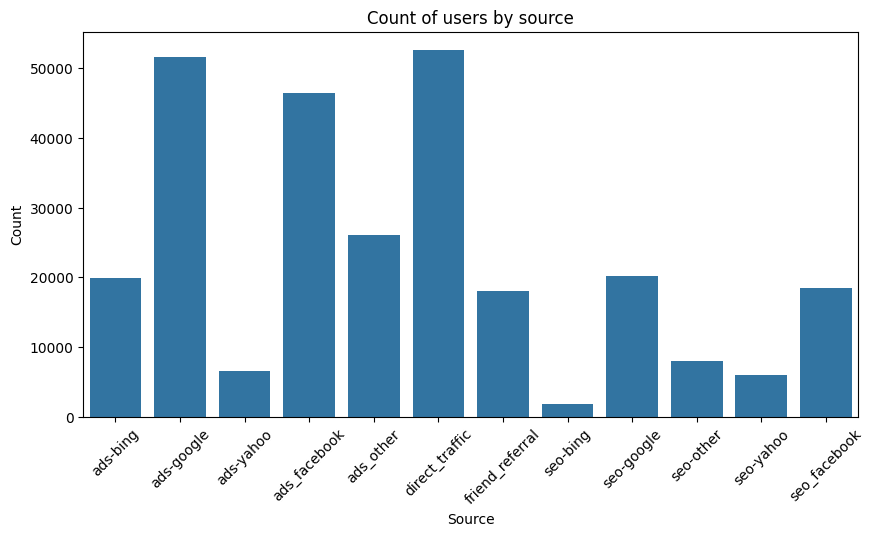

In [53]:
count_source = combined.groupby('source').count()

fig, ax = plt.subplots(1, figsize=(10,5))
sns.barplot(data=count_source, x=count_source.index, y='user_id', ax=ax)
ax.set_title('Count of users by source')
ax.set_ylabel('Count')
ax.set_xlabel('Source')
plt.xticks(rotation=45)
plt.show()

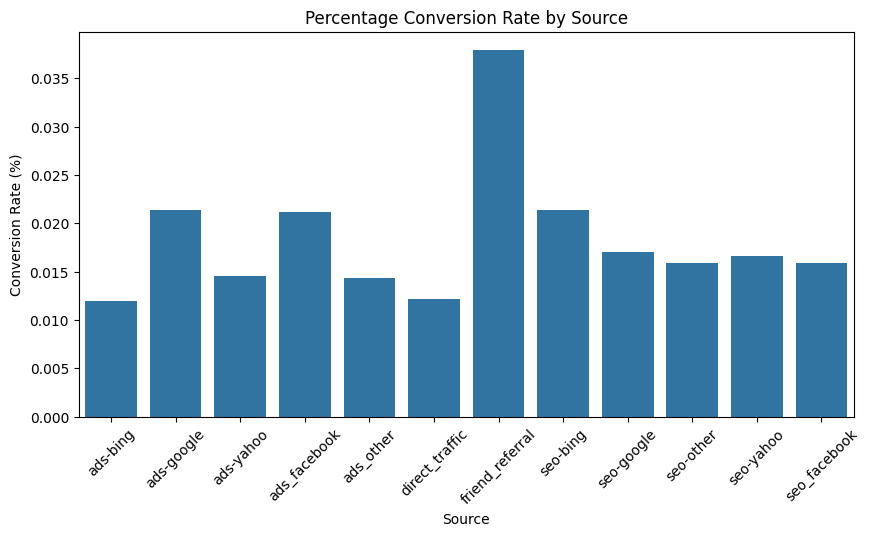

In [55]:
# Calculate the conversion rate for each source
conversion_rate = combined.groupby('source')['converted'].mean().reset_index()

# Plot the conversion rate
plt.figure(figsize=(10,5))
sns.barplot(data = conversion_rate, x='source', y='converted')
plt.title('Percentage Conversion Rate by Source')
plt.xlabel('Source')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# combined.to_csv('combined.csv', index = False)

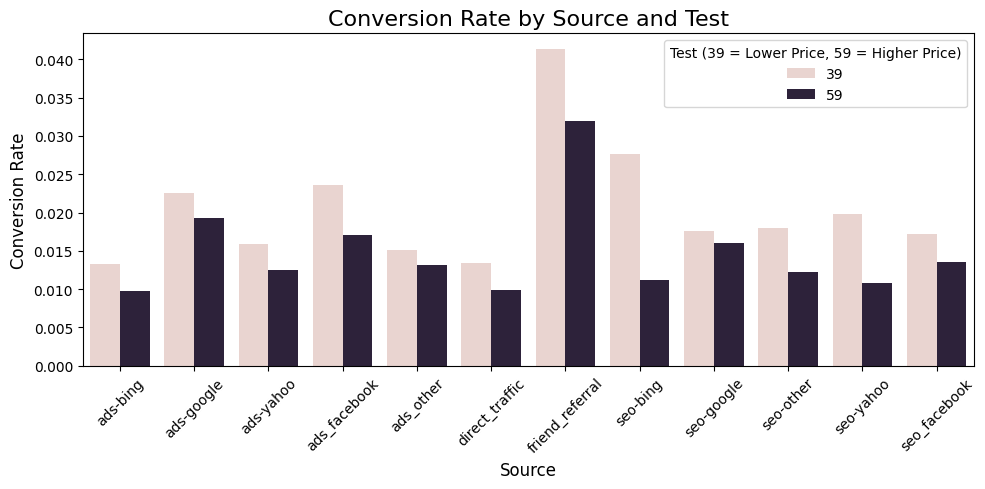

In [ ]:
# Conversion Rates, stack bars by Source/Price, by group
conversion_by_source_test = combined.groupby(['source', 'price'])['converted'].mean().reset_index()

plt.subplots(1, figsize=(10,5)) 
sns.barplot(data=conversion_by_source_test, x='source', y='converted', hue='price')
plt.title('Conversion Rate by Source and Test', fontsize=16)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xlabel('Source', fontsize=12)
plt.legend(title='Test (39 = Lower Price, 59 = Higher Price)', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


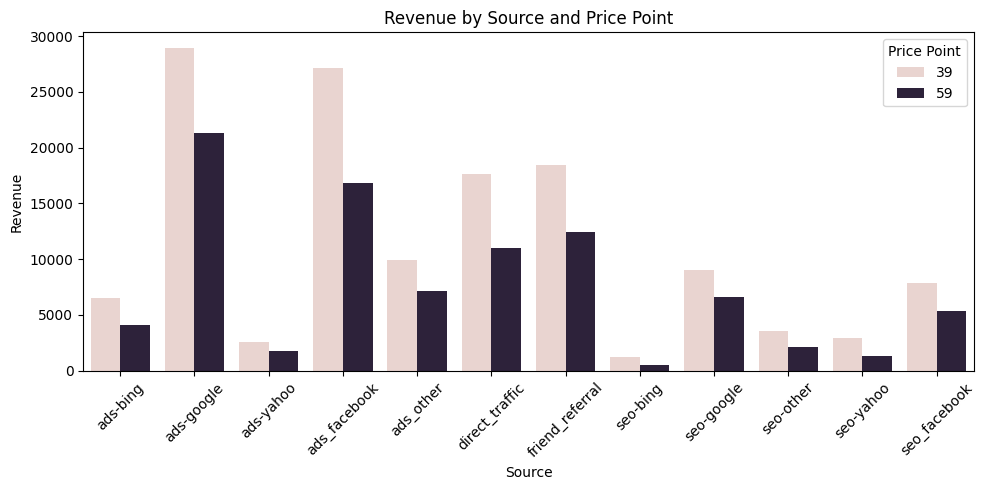

In [62]:
# Calculate the revenue for each source and price point
combined['revenue'] = combined['price'] * combined['converted']
revenue_by_source_price = combined.groupby(['source', 'price'])['revenue'].sum().reset_index()

# Plot the revenue by source and price point
plt.figure(figsize=(10,5))
sns.barplot(data=revenue_by_source_price, x='source', y='revenue', hue='price')
plt.title('Revenue by Source and Price Point')
plt.xlabel('Source')
plt.ylabel('Revenue')
plt.legend(title='Price Point')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()